In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
! cp drive/MyDrive/ML/cumulative.csv .

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Reading the data
dataframe = pd.read_csv('cumulative.csv')

In [8]:
#Removing the candidate exoplanets since they create ambuiguity. 
dataframe = dataframe.loc[dataframe["koi_disposition"] != "CANDIDATE"]
dataframe = dataframe.reset_index()

In [9]:
#Converting labels from string to -1 or 1 depending on whether the label is confirmed or its false positive. 
dataframe["koi_pdisposition"] = dataframe["koi_pdisposition"].apply(lambda x: -1 if x=='FALSE POSITIVE' else 1)
#Checking correlation between "koi_pdisposition" and "koi_score"
dataframe["koi_pdisposition"].corr(dataframe["koi_score"])

0.9892231135676749

In [10]:
#checking for columns with more than 100 missing values
for column in dataframe.columns:
  if(dataframe[column].isna().sum() > 1000):
    print(column)
    print(dataframe[column].isna().sum())

kepler_name
5022
koi_score
1059
koi_teq_err1
7316
koi_teq_err2
7316


In [11]:
#Dropping columns
# dataframe.drop("kepler_name", inplace=True, axis=1) #Name has no relevance
dataframe.drop("kepoi_name", inplace=True, axis=1) #Name has no relevance
dataframe.drop("rowid", inplace=True, axis=1) #Id has no relevance
dataframe.drop("kepid", inplace=True, axis=1) #Id has no relevance
dataframe.drop("koi_tce_delivname", inplace=True, axis=1) #Name has no relevance
dataframe.drop("koi_teq_err1", inplace=True, axis=1) #Too many missing values
dataframe.drop("koi_teq_err2", inplace=True, axis=1)  #Too many missing values

In [12]:
na_list = dataframe.isnull().sum(axis=1)
index_list = []
#Dropping rows with more than 10 missing values. 
for i in range(len(na_list)):
  if(na_list[i] >=10):
    index_list.append(i)
dataframe.drop(index_list,inplace=True)

In [13]:
for column in dataframe.columns:
  print("{} {}".format(dataframe[column].isna().sum(),column),dataframe[column].dtype)

0 index int64
4646 kepler_name object
0 koi_disposition object
0 koi_pdisposition int64
813 koi_score float64
0 koi_fpflag_nt int64
0 koi_fpflag_ss int64
0 koi_fpflag_co int64
0 koi_fpflag_ec int64
0 koi_period float64
0 koi_period_err1 float64
0 koi_period_err2 float64
0 koi_time0bk float64
0 koi_time0bk_err1 float64
0 koi_time0bk_err2 float64
0 koi_impact float64
0 koi_impact_err1 float64
0 koi_impact_err2 float64
0 koi_duration float64
0 koi_duration_err1 float64
0 koi_duration_err2 float64
0 koi_depth float64
0 koi_depth_err1 float64
0 koi_depth_err2 float64
0 koi_prad float64
0 koi_prad_err1 float64
0 koi_prad_err2 float64
0 koi_teq float64
0 koi_insol float64
0 koi_insol_err1 float64
0 koi_insol_err2 float64
0 koi_model_snr float64
206 koi_tce_plnt_num float64
0 koi_steff float64
95 koi_steff_err1 float64
110 koi_steff_err2 float64
0 koi_slogg float64
95 koi_slogg_err1 float64
95 koi_slogg_err2 float64
0 koi_srad float64
95 koi_srad_err1 float64
95 koi_srad_err2 float64
0 ra floa

In [14]:
#Replacing missing values with the mean of the remaining entries of the column.
for param in dataframe.columns:
  if(dataframe[param].dtype!= "object"):
    reqMean = dataframe[param].mean()
    dataframe[param] = dataframe[param].replace(np.nan, reqMean)
    

In [15]:
df = dataframe
print(dataframe.shape)
print(df.duplicated().sum())

(6939, 45)
0


In [ ]:
df.columns

Index(['index', 'kepler_name', 'koi_disposition', 'koi_pdisposition',
       'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [ ]:
df.head()

index   kepler_name koi_disposition  koi_pdisposition  koi_score  \
0      0  Kepler-227 b       CONFIRMED                 1      1.000   
1      1  Kepler-227 c       CONFIRMED                 1      0.969   
2      2           NaN  FALSE POSITIVE                -1      0.000   
3      3           NaN  FALSE POSITIVE                -1      0.000   
4      4  Kepler-664 b       CONFIRMED                 1      1.000   

   koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0              0              0              0              0    9.488036   
1              0              0              0              0   54.418383   
2              0              1              0              0   19.899140   
3              0              1              0              0    1.736952   
4              0              0              0              0    2.525592   

   ...  koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0  ...           -81.0      4.467           0.064          -0.096     0.927   
1  ...           -81.0      4.467           0.064          -0.096     0.927   
2  ...          -176.0      4.544           0.044          -0.176     0.868   
3  ...          -174.0      4.564           0.053          -0.168     0.791   
4  ...          -211.0      4.438           0.070          -0.210     1.046   

   koi_srad_err1  koi_srad_err2         ra        dec  koi_kepmag  
0          0.105         -0.061  291.93423  48.141651      15.347  
1          0.105         -0.061  291.93423  48.141651      15.347  
2          0.233         -0.078  297.00482  48.134129      15.436  
3          0.201         -0.067  285.53461  48.285210      15.597  
4          0.334         -0.133  288.75488  48.226200      15.509  

[5 rows x 45 columns]

In [ ]:
print((df['koi_disposition'].value_counts()/df['koi_disposition'].count())*100)

FALSE POSITIVE    66.969304
CONFIRMED         33.030696
Name: koi_disposition, dtype: float64


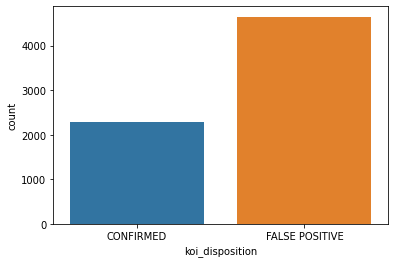

In [ ]:
#unbalanced dataset
sns.countplot(x='koi_disposition', data=df)
plt.show()

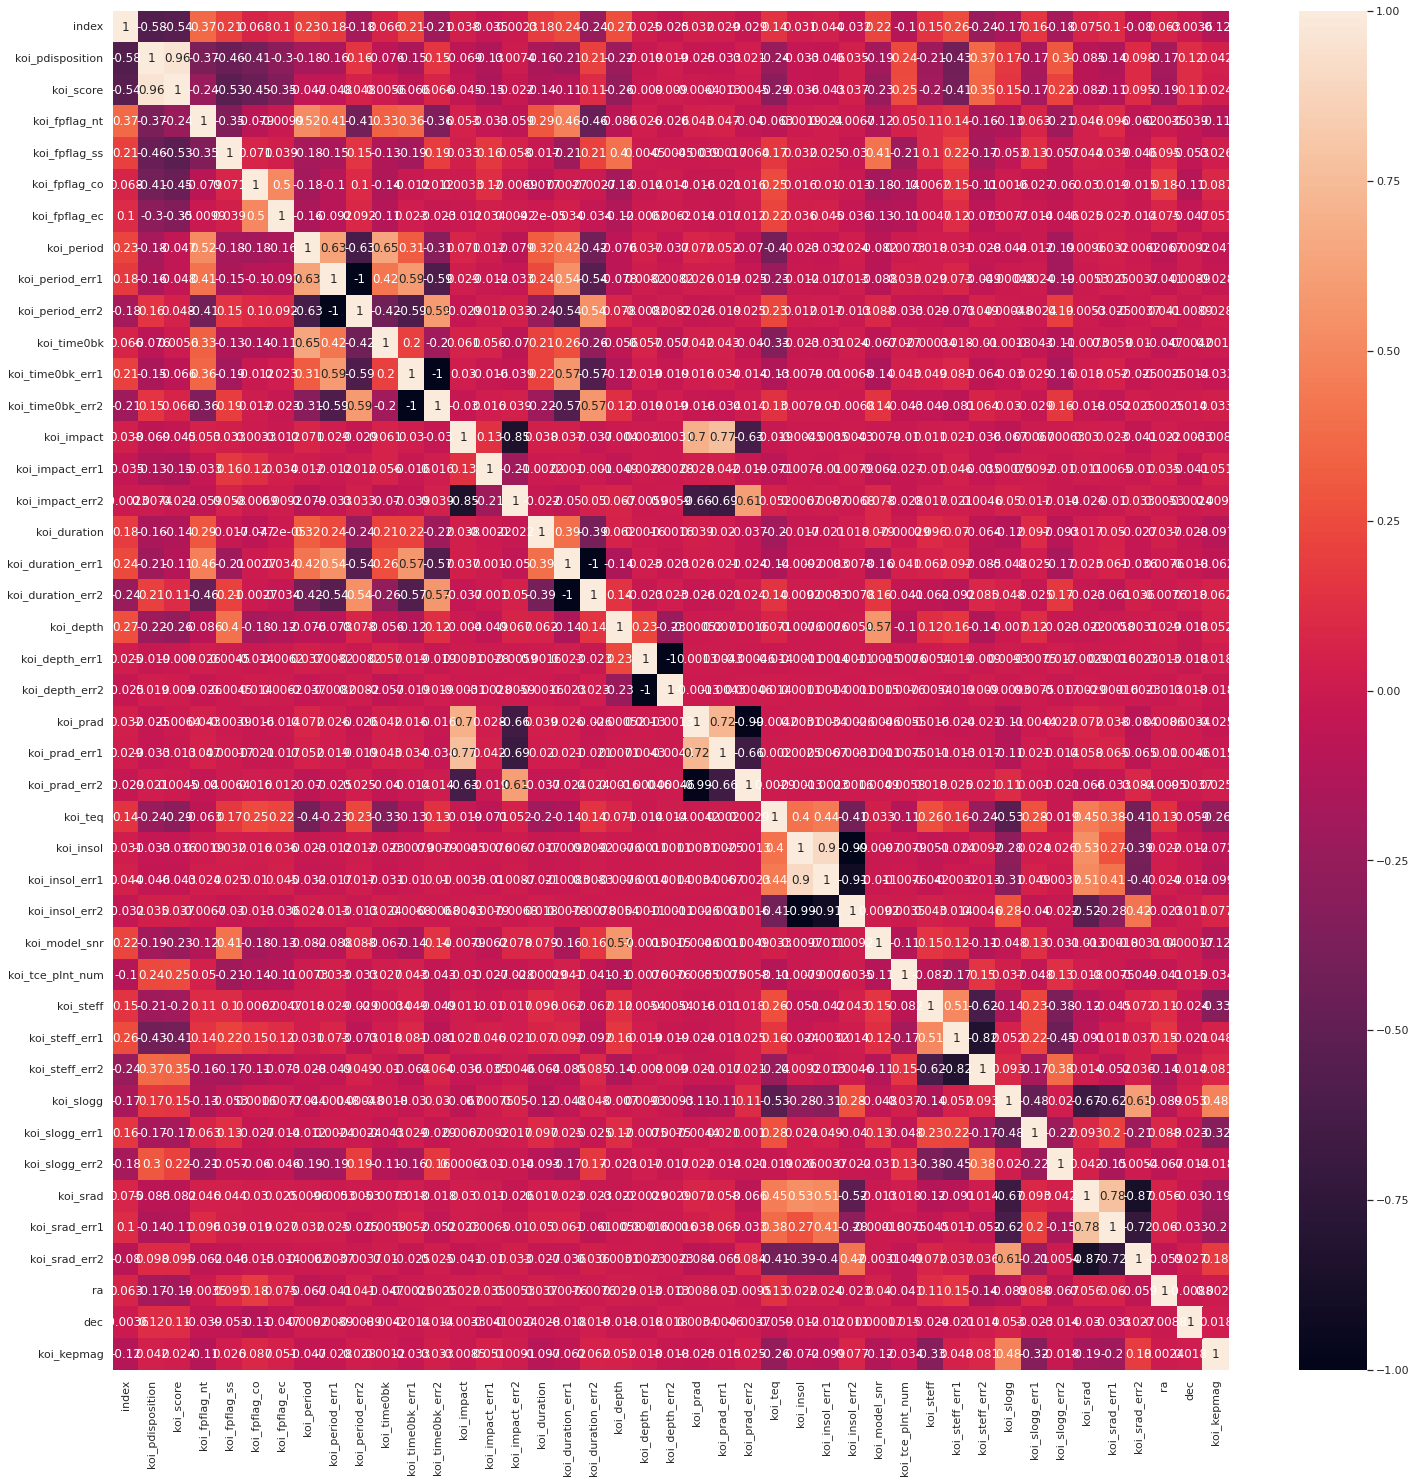

In [ ]:
correlation = df.corr()
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

In [16]:
df['is_confirmed_planet'] = df['kepler_name'].notna()
df.drop("kepler_name", inplace=True, axis=1)

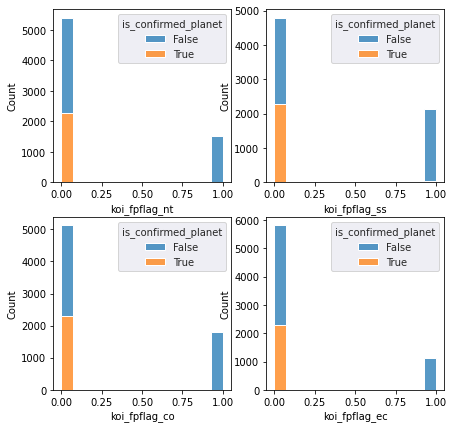

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

import seaborn as sns
sns.set_style("dark")

sns.histplot(data=df, x='koi_fpflag_nt', hue='is_confirmed_planet', multiple="stack",ax=axs[0, 0])
sns.histplot(data=df, x='koi_fpflag_ss', hue='is_confirmed_planet', multiple="stack",ax=axs[0, 1])
sns.histplot(data=df, x='koi_fpflag_ec', hue='is_confirmed_planet', multiple="stack",ax=axs[1, 1])
sns.histplot(data=df, x='koi_fpflag_co', hue='is_confirmed_planet', multiple="stack",ax=axs[1, 0])

(array([3766.,  956.,  435.,  250.,  170.,  112.,   81.,   66.,   68.,
          43.,   29.,   51.,   30.,   28.,   22.,   30.,   20.,   22.,
          28.,   23.,   28.,   20.,   18.,   20.,   20.,   16.,   15.,
          18.,   20.,    7.,   14.,   20.,   13.,   17.,   29.,   71.,
          72.,   36.,   23.,   16.,    8.,   17.,    8.,   11.,   16.,
          10.,   16.,    6.,   16.]),
 array([  0.        ,  10.20408163,  20.40816327,  30.6122449 ,
         40.81632653,  51.02040816,  61.2244898 ,  71.42857143,
         81.63265306,  91.83673469, 102.04081633, 112.24489796,
        122.44897959, 132.65306122, 142.85714286, 153.06122449,
        163.26530612, 173.46938776, 183.67346939, 193.87755102,
        204.08163265, 214.28571429, 224.48979592, 234.69387755,
        244.89795918, 255.10204082, 265.30612245, 275.51020408,
        285.71428571, 295.91836735, 306.12244898, 316.32653061,
        326.53061224, 336.73469388, 346.93877551, 357.14285714,
        367.34693878, 377.55102

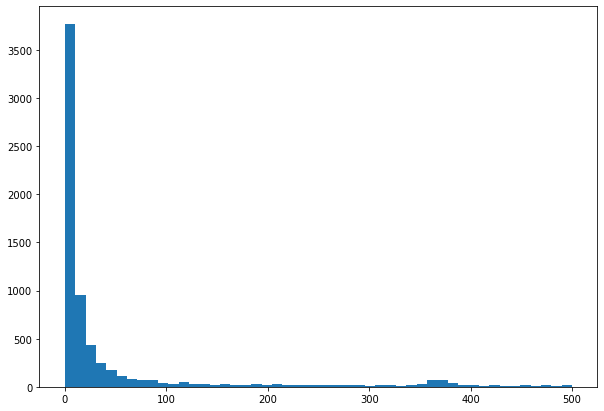

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 500)
ax.hist(df.koi_period, x)

(array([933., 447., 359., 292., 304., 293., 300., 260., 272., 298., 233.,
        251., 264., 274., 240., 275., 266., 308., 262., 259., 230., 277.,
        350., 418., 203.,  75.,  72.,  84., 145., 245., 284., 169.,  28.,
         13.,  10.,   3.,   5.,   3.,   3.,   5.,   4.,   2.,   2.,   2.,
          2.,   3.,   3.,   3.,   3.]),
 array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
        0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
        0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
        0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
        0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
        1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
        1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
        1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
        1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
        1.83673469, 1.87755102, 1.91836735, 1.959183

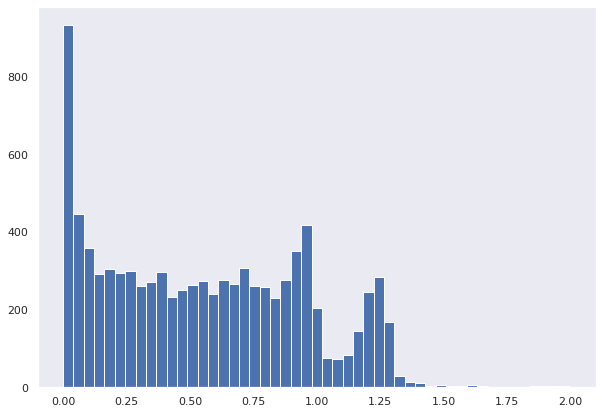

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 2)
ax.hist(df.koi_impact, x)

(array([  36.,  392.,  795., 1043., 1067., 1007.,  813.,  649.,  525.,
         405.,  320.,  270.,  200.,  171.,  144.,  112.,   95.,  112.,
          86.,   69.,   79.,   51.,   56.,   53.,   49.,   45.,   44.,
          35.,   27.,   25.,   23.,   24.,   25.,   17.,   17.,   18.,
          15.,   13.,   22.,   14.,    9.,    5.,    8.,    4.,    5.,
           6.,   10.,    8.,    2.]),
 array([ 0.        ,  0.6122449 ,  1.2244898 ,  1.83673469,  2.44897959,
         3.06122449,  3.67346939,  4.28571429,  4.89795918,  5.51020408,
         6.12244898,  6.73469388,  7.34693878,  7.95918367,  8.57142857,
         9.18367347,  9.79591837, 10.40816327, 11.02040816, 11.63265306,
        12.24489796, 12.85714286, 13.46938776, 14.08163265, 14.69387755,
        15.30612245, 15.91836735, 16.53061224, 17.14285714, 17.75510204,
        18.36734694, 18.97959184, 19.59183673, 20.20408163, 20.81632653,
        21.42857143, 22.04081633, 22.65306122, 23.26530612, 23.87755102,
        24.48979592, 25

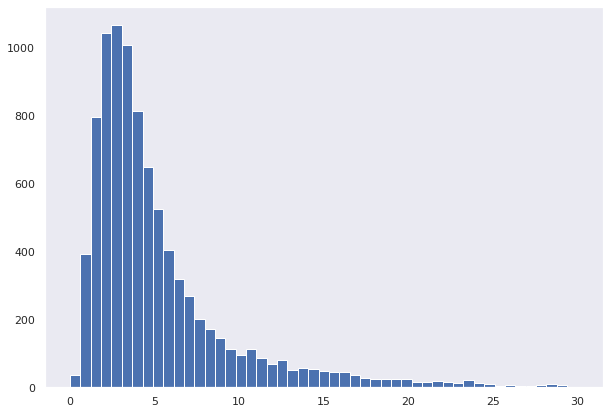

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 30)
ax.hist(df.koi_duration, x)

(array([2018., 1590.,  974.,  674.,  454.,  356.,  271.,  213.,  127.,
         116.,   88.,   73.,   49.,   40.,   57.,   35.,   38.,   25.,
          21.,   22.,   22.,   27.,   16.,   13.,   11.,   16.,   10.,
           9.,   10.,   12.,   14.,    9.,   14.,   16.,   14.,   17.,
           7.,    9.,    9.,   10.,   11.,   11.,    9.,   12.,    5.,
           7.,    6.,    8.,   12.]),
 array([   0.        ,  142.85714286,  285.71428571,  428.57142857,
         571.42857143,  714.28571429,  857.14285714, 1000.        ,
        1142.85714286, 1285.71428571, 1428.57142857, 1571.42857143,
        1714.28571429, 1857.14285714, 2000.        , 2142.85714286,
        2285.71428571, 2428.57142857, 2571.42857143, 2714.28571429,
        2857.14285714, 3000.        , 3142.85714286, 3285.71428571,
        3428.57142857, 3571.42857143, 3714.28571429, 3857.14285714,
        4000.        , 4142.85714286, 4285.71428571, 4428.57142857,
        4571.42857143, 4714.28571429, 4857.14285714, 5000.     

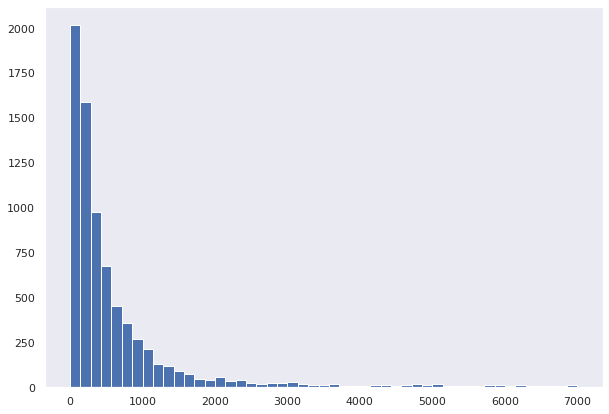

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 7000)
ax.hist(df.koi_depth, x)

(array([3872., 2075.,  336.,  180.,  115.,  116.,   94.,   94.,   74.,
          80.,   93.,   97.,   96.,   81.,  103.,   69.,   59.,   68.,
          75.,   77.,   58.,   61.,   53.,   46.,   71.,   62.,   38.,
          43.,   36.,   37.,   38.,   28.,   31.,   32.,   21.,   28.,
          22.,   22.,   24.,   16.,   17.,    8.,   14.,   18.,   22.,
          19.,    8.,   16.,    5.]),
 array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
          8.16326531,  10.20408163,  12.24489796,  14.28571429,
         16.32653061,  18.36734694,  20.40816327,  22.44897959,
         24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
         32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
         40.81632653,  42.85714286,  44.89795918,  46.93877551,
         48.97959184,  51.02040816,  53.06122449,  55.10204082,
         57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
         65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
         73.46938776,  75.51020

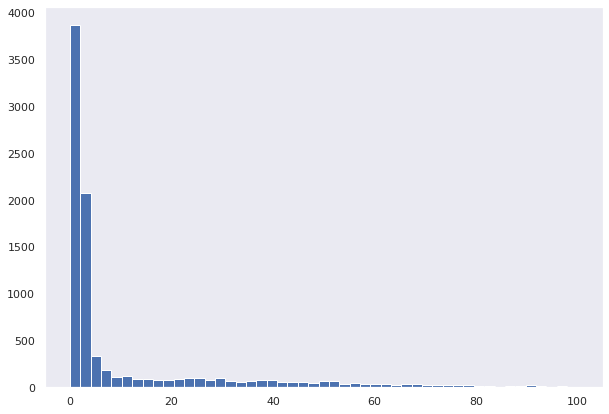

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 100)
ax.hist(df.koi_prad, x)

(array([  9., 375., 817., 704., 882., 841., 814., 697., 654., 531., 412.,
        357., 299., 291., 219., 186., 179., 146., 104.,  89.,  77.,  55.,
         61.,  38.,  37.,  30.,  34.,  22.,  15.,  18.,  13.,  10.,   4.,
          6.,  10.,   5.,   7.,   2.,   3.,   4.,   7.,   7.,   5.,   3.,
          1.,   1.,   2.,   0.,   1.]),
 array([   0.        ,  122.44897959,  244.89795918,  367.34693878,
         489.79591837,  612.24489796,  734.69387755,  857.14285714,
         979.59183673, 1102.04081633, 1224.48979592, 1346.93877551,
        1469.3877551 , 1591.83673469, 1714.28571429, 1836.73469388,
        1959.18367347, 2081.63265306, 2204.08163265, 2326.53061224,
        2448.97959184, 2571.42857143, 2693.87755102, 2816.32653061,
        2938.7755102 , 3061.2244898 , 3183.67346939, 3306.12244898,
        3428.57142857, 3551.02040816, 3673.46938776, 3795.91836735,
        3918.36734694, 4040.81632653, 4163.26530612, 4285.71428571,
        4408.16326531, 4530.6122449 , 4653.06122449,

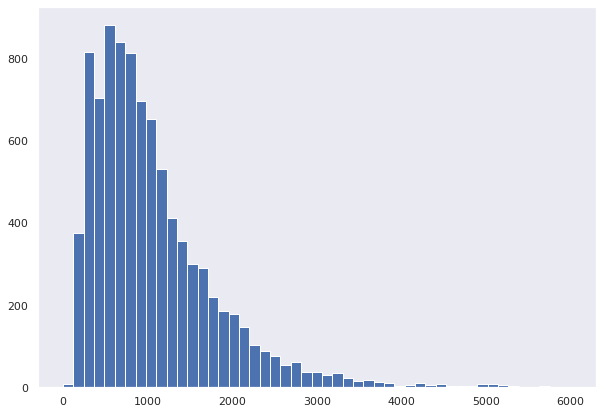

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 6000)
ax.hist(df.koi_teq, x)

(array([4168.,  891.,  583.,  358.,  281.,  209.,  165.,  140.,  124.,
          99.,   95.,   89.,   55.,   81.,   60.,   50.,   58.,   71.,
          56.,   50.,   40.,   37.,   28.,   41.,   31.,   33.,   36.,
          26.,   25.,   23.,   26.,   18.,   27.,   11.,   29.,   22.,
          25.,   25.,   15.,   15.,   17.,   13.,   10.,   18.,   16.,
          22.,   13.,   16.,   12.]),
 array([   0.        ,  102.04081633,  204.08163265,  306.12244898,
         408.16326531,  510.20408163,  612.24489796,  714.28571429,
         816.32653061,  918.36734694, 1020.40816327, 1122.44897959,
        1224.48979592, 1326.53061224, 1428.57142857, 1530.6122449 ,
        1632.65306122, 1734.69387755, 1836.73469388, 1938.7755102 ,
        2040.81632653, 2142.85714286, 2244.89795918, 2346.93877551,
        2448.97959184, 2551.02040816, 2653.06122449, 2755.10204082,
        2857.14285714, 2959.18367347, 3061.2244898 , 3163.26530612,
        3265.30612245, 3367.34693878, 3469.3877551 , 3571.42857

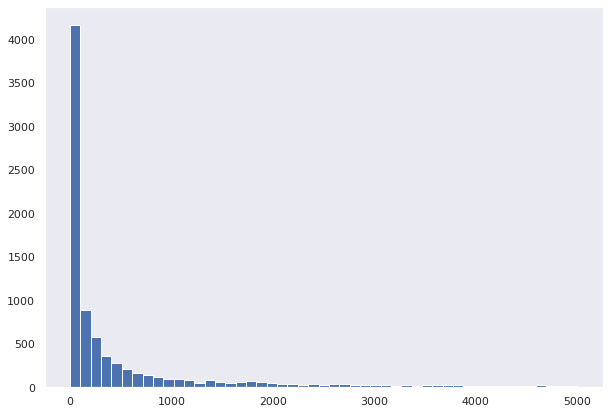

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 5000)
ax.hist(df.koi_insol, x)

(array([2908., 2211.,  864.,  475.,  274.,  191.,  153.,  117.,  112.,
          70.,   62.,   63.,   59.,   39.,   40.,   38.,   34.,   38.,
          30.,   31.,   37.,   35.,   19.,   17.,   20.,   19.,   15.,
          21.,    7.,   19.,   17.,   24.,   14.,   13.,    9.,   15.,
          11.,   21.,   15.,   12.,   13.,    9.,   10.,   13.,   13.,
           9.,   13.,   11.,    8.]),
 array([  0.        ,  14.28571429,  28.57142857,  42.85714286,
         57.14285714,  71.42857143,  85.71428571, 100.        ,
        114.28571429, 128.57142857, 142.85714286, 157.14285714,
        171.42857143, 185.71428571, 200.        , 214.28571429,
        228.57142857, 242.85714286, 257.14285714, 271.42857143,
        285.71428571, 300.        , 314.28571429, 328.57142857,
        342.85714286, 357.14285714, 371.42857143, 385.71428571,
        400.        , 414.28571429, 428.57142857, 442.85714286,
        457.14285714, 471.42857143, 485.71428571, 500.        ,
        514.28571429, 528.57142

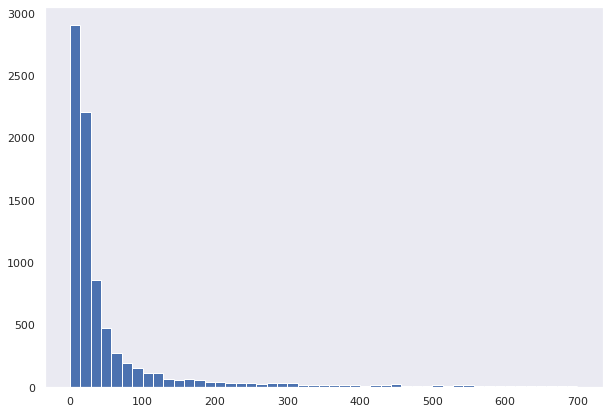

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 700)
ax.hist(df.koi_model_snr, x)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 1.000e+00,
        0.000e+00, 1.400e+01, 2.700e+01, 3.800e+01, 1.040e+02, 1.000e+02,
        5.100e+01, 9.100e+01, 1.050e+02, 1.320e+02, 1.340e+02, 3.160e+02,
        4.660e+02, 5.280e+02, 6.100e+02, 8.330e+02, 9.160e+02, 1.133e+03,
        1.055e+03, 9.060e+02, 5.890e+02, 3.380e+02, 1.790e+02, 1.000e+02,
        6.700e+01, 4.700e+01, 3.900e+01, 2.000e+01, 2.800e+01, 1.900e+01,
        1.400e+01, 1.800e+01, 1.000e+01, 7.000e+00, 8.000e+00, 1.100e+01,
        8.000e+00, 6.000e+00, 5.000e+00, 7.000e+00, 6.000e+00, 1.000e+00,
        3.000e+00]),
 array([ 2000.        ,  2163.26530612,  2326.53061224,  2489.79591837,
         2653.06122449,  2816.32653061,  2979.59183673,  3142.85714286,
         3306.12244898,  3469.3877551 ,  3632.65306122,  3795.91836735,
         3959.18367347,  4122.44897959,  4285.71428571,  4448.97959184,
         4612.24489796,  4775.51020408,  4938.7755102 ,  5102.04081633,
         5265.30612245,  54

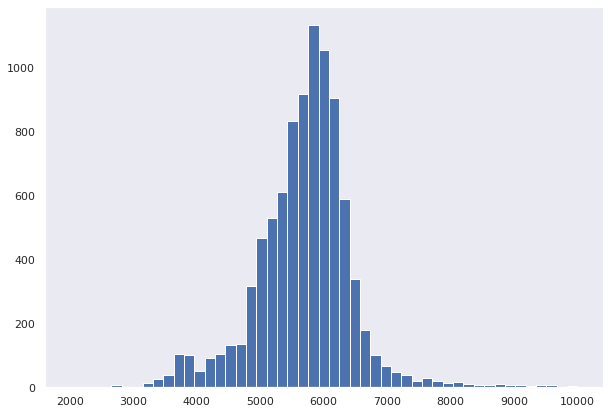

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(2000, 10000)
ax.hist(df.koi_steff, x)

(array([2.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.100e+01, 2.200e+01,
        1.300e+01, 2.100e+01, 1.300e+01, 1.900e+01, 1.500e+01, 2.600e+01,
        3.200e+01, 2.600e+01, 2.600e+01, 2.800e+01, 2.800e+01, 4.000e+01,
        5.100e+01, 7.600e+01, 1.060e+02, 1.420e+02, 1.840e+02, 1.890e+02,
        2.790e+02, 3.560e+02, 4.470e+02, 5.330e+02, 7.130e+02, 1.324e+03,
        1.795e+03, 1.652e+03, 5.270e+02, 2.430e+02, 6.200e+01, 3.000e+01,
        1.000e+01, 6.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([2.        , 2.08163265, 2.16326531, 2.24489796, 2.32653061,
        2.40816327, 2.48979592, 2.57142857, 2.65306122, 2.73469388,
        2.81632653, 2.89795918, 2.97959184, 3.06122449, 3.14285714,
        3.2244898 , 3.30612245, 3.3877551 , 3.46938776, 3.55102041,
        3.63265306, 3.71428571, 3.79591837, 3.87755102, 3.95918367,
        4.04081633, 4.12244898, 4.20408163, 4.2

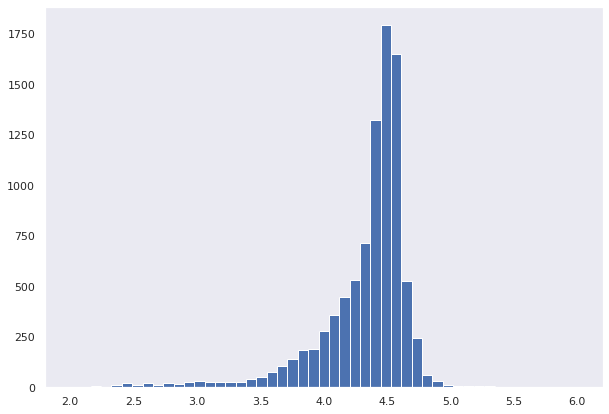

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(2, 6)
ax.hist(df.koi_slogg, x)

(array([   7.,   14.,   23.,   91.,  351.,  656., 1545., 1618., 1392.,
         715.,  444.,  359.,  247.,  246.,  159.,  130.,  115.,   98.,
          81.,   65.,   57.,   55.,   43.,   40.,   40.,   35.,   36.,
          28.,   22.,   16.,   13.,   14.,   11.,    9.,    9.,   18.,
          12.,    4.,    7.,   10.,    8.,    7.,    4.,    6.,    2.,
           5.,    2.,    4.,    5.]),
 array([0.        , 0.12244898, 0.24489796, 0.36734694, 0.48979592,
        0.6122449 , 0.73469388, 0.85714286, 0.97959184, 1.10204082,
        1.2244898 , 1.34693878, 1.46938776, 1.59183673, 1.71428571,
        1.83673469, 1.95918367, 2.08163265, 2.20408163, 2.32653061,
        2.44897959, 2.57142857, 2.69387755, 2.81632653, 2.93877551,
        3.06122449, 3.18367347, 3.30612245, 3.42857143, 3.55102041,
        3.67346939, 3.79591837, 3.91836735, 4.04081633, 4.16326531,
        4.28571429, 4.40816327, 4.53061224, 4.65306122, 4.7755102 ,
        4.89795918, 5.02040816, 5.14285714, 5.26530612, 5.38775

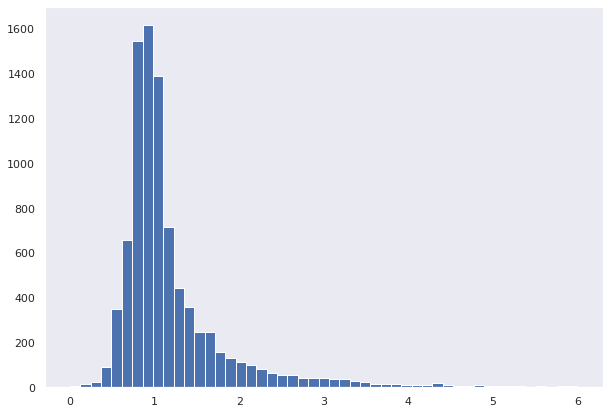

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 6)
ax.hist(df.koi_srad, x)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  23., 105., 168., 278., 332., 398., 455., 472., 505.,
        725., 837., 749., 678., 756., 709., 677., 585., 431., 165.,  62.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([265.        , 266.12244898, 267.24489796, 268.36734694,
        269.48979592, 270.6122449 , 271.73469388, 272.85714286,
        273.97959184, 275.10204082, 276.2244898 , 277.34693878,
        278.46938776, 279.59183673, 280.71428571, 281.83673469,
        282.95918367, 284.08163265, 285.20408163, 286.32653061,
        287.44897959, 288.57142857, 289.69387755, 290.81632653,
        291.93877551, 293.06122449, 294.18367347, 295.30612245,
        296.42857143, 297.55102041, 298.67346939, 299.79591837,
        300.91836735, 302.04081633, 303.16326531, 304.28571429,
        305.40816327, 306.53061224, 307.65306122, 308.7755102 ,
        309.89795918, 31

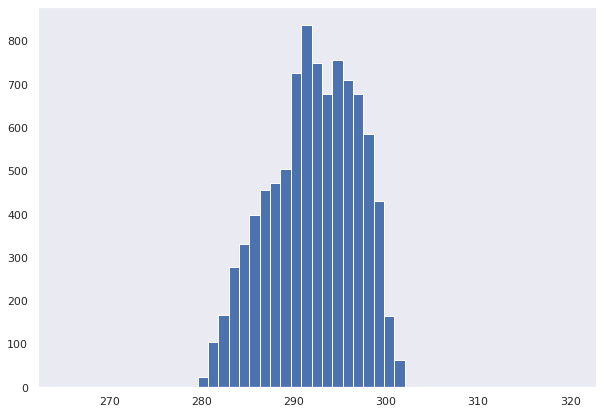

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(265, 320)
ax.hist(df.ra, x)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
         39., 198., 368., 406., 366., 508., 570., 514., 513., 520., 386.,
        478., 524., 431., 392., 458., 526., 420., 362., 280., 269., 219.,
        189., 122.,  40.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
        33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
        36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
        39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
        42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
        45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
        48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
        51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
        54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       

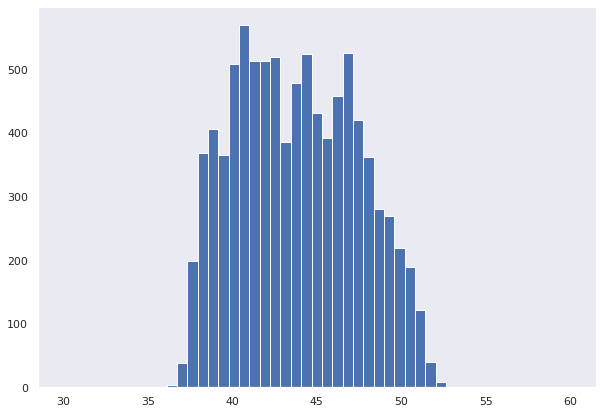

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(30, 60)
ax.hist(df.dec, x)

(array([  0.,   1.,   2.,   5.,   2.,   2.,   9.,   3.,  12.,   7.,  13.,
         26.,  22.,  37.,  49.,  65.,  98., 131., 128., 172., 236., 260.,
        369., 411., 562., 642., 557., 479., 639., 766., 787., 888., 813.,
        698.,  45.,  40.,  33.,  26.,  15.,  23.,  12.,   7.,   4.,   4.,
          2.,   2.,   2.,   1.,   0.]),
 array([ 7.        ,  7.26530612,  7.53061224,  7.79591837,  8.06122449,
         8.32653061,  8.59183673,  8.85714286,  9.12244898,  9.3877551 ,
         9.65306122,  9.91836735, 10.18367347, 10.44897959, 10.71428571,
        10.97959184, 11.24489796, 11.51020408, 11.7755102 , 12.04081633,
        12.30612245, 12.57142857, 12.83673469, 13.10204082, 13.36734694,
        13.63265306, 13.89795918, 14.16326531, 14.42857143, 14.69387755,
        14.95918367, 15.2244898 , 15.48979592, 15.75510204, 16.02040816,
        16.28571429, 16.55102041, 16.81632653, 17.08163265, 17.34693878,
        17.6122449 , 17.87755102, 18.14285714, 18.40816327, 18.67346939,
       

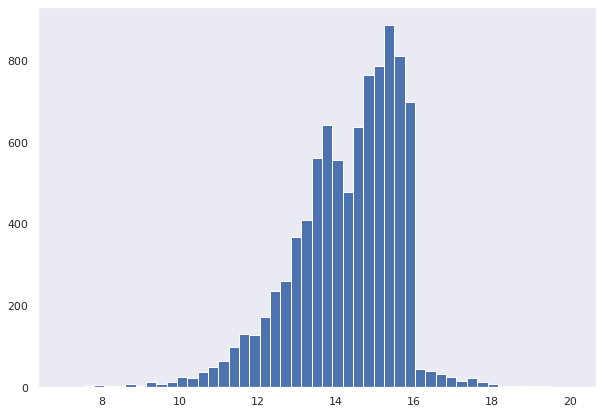

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(7, 20)
ax.hist(df.koi_kepmag, x)

In [ ]:
df_base_features = df[['koi_disposition', 'koi_period', 'koi_duration', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_steff', 'koi_srad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_slogg', 'ra', 'dec', 'koi_kepmag']]

In [ ]:
df_base_features.columns

Index(['koi_disposition', 'koi_period', 'koi_duration', 'koi_impact',
       'koi_depth', 'koi_prad', 'koi_steff', 'koi_srad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_slogg', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

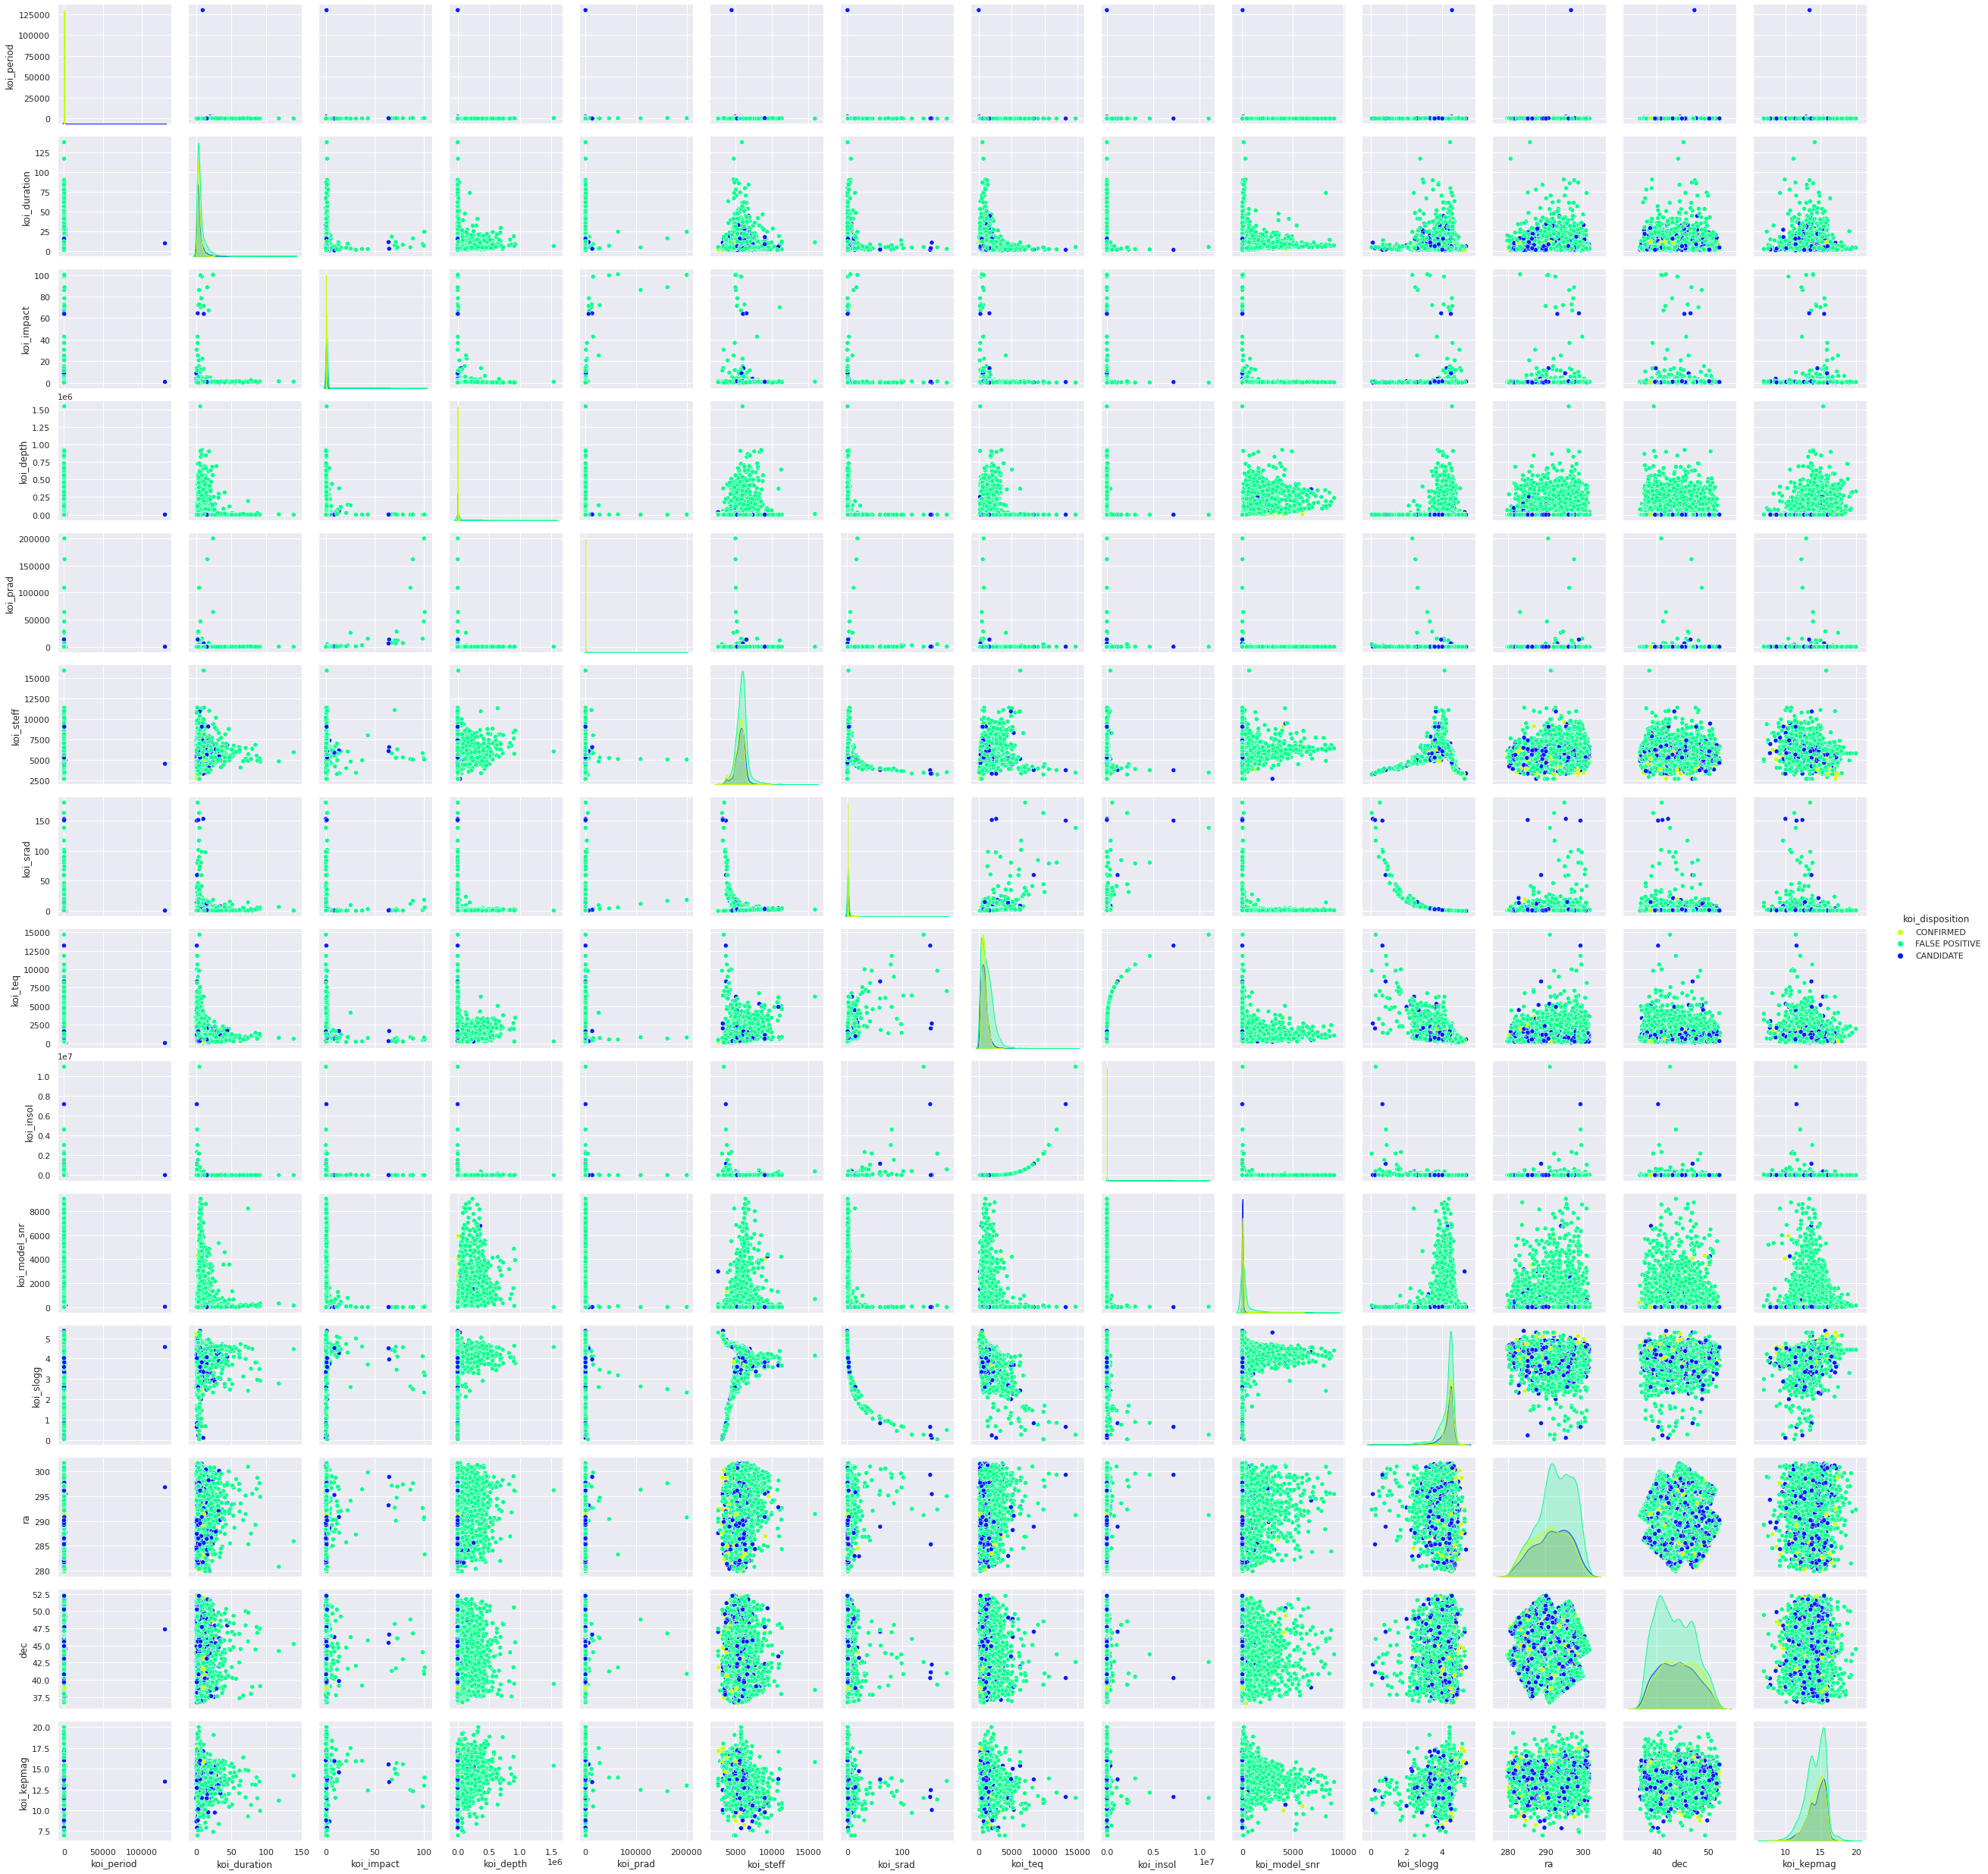

In [ ]:
sns.pairplot(df_base_features, hue = 'koi_disposition', palette='gist_rainbow')
plt.show()

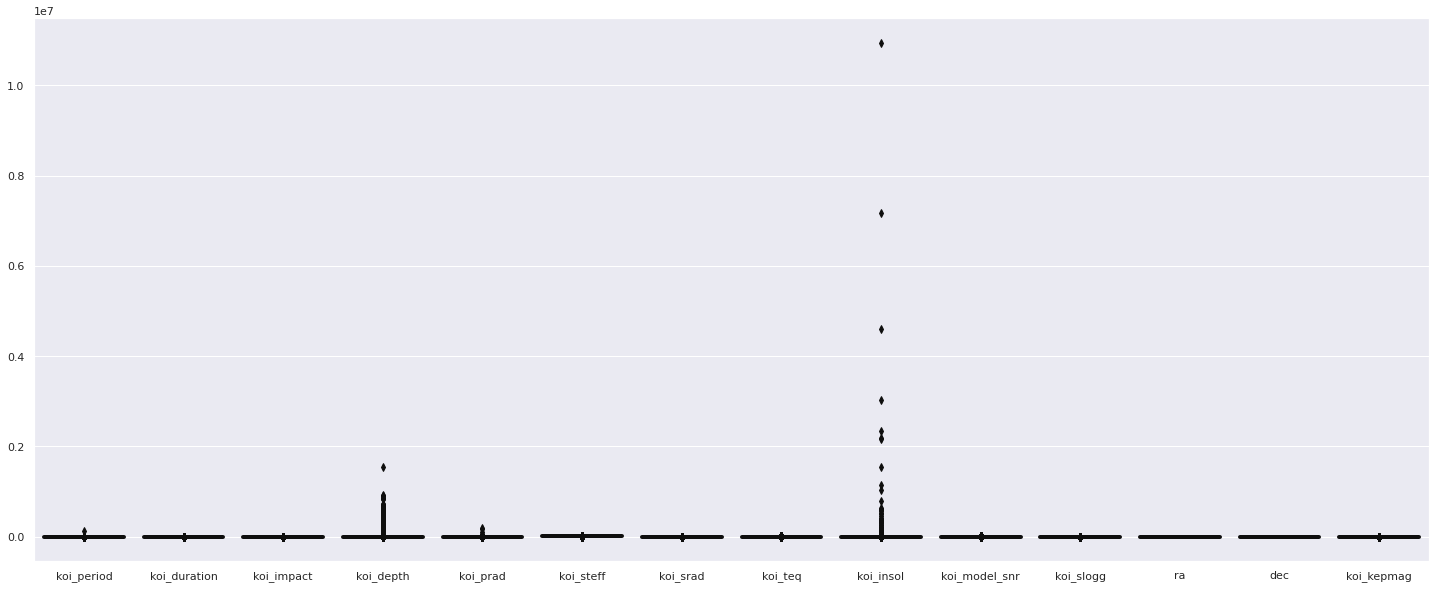

In [ ]:
sns.set(rc = {'figure.figsize':(25, 100)})
sns.boxplot(data=df_base_features, palette='mako', linewidth=4)

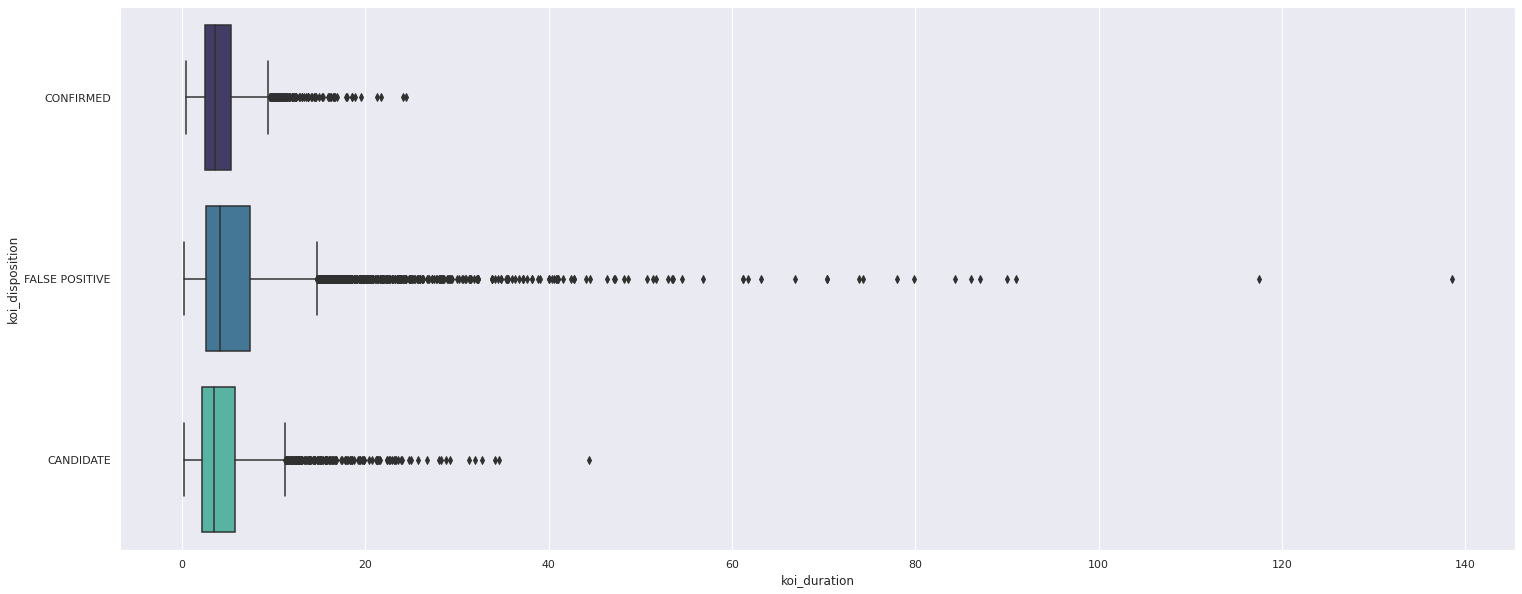

In [ ]:
sns.boxplot(x=df_base_features.koi_duration, y = df_base_features.koi_disposition, palette='mako')

In [17]:
df.drop("is_confirmed_planet", inplace=True, axis=1) #Column added for visualization

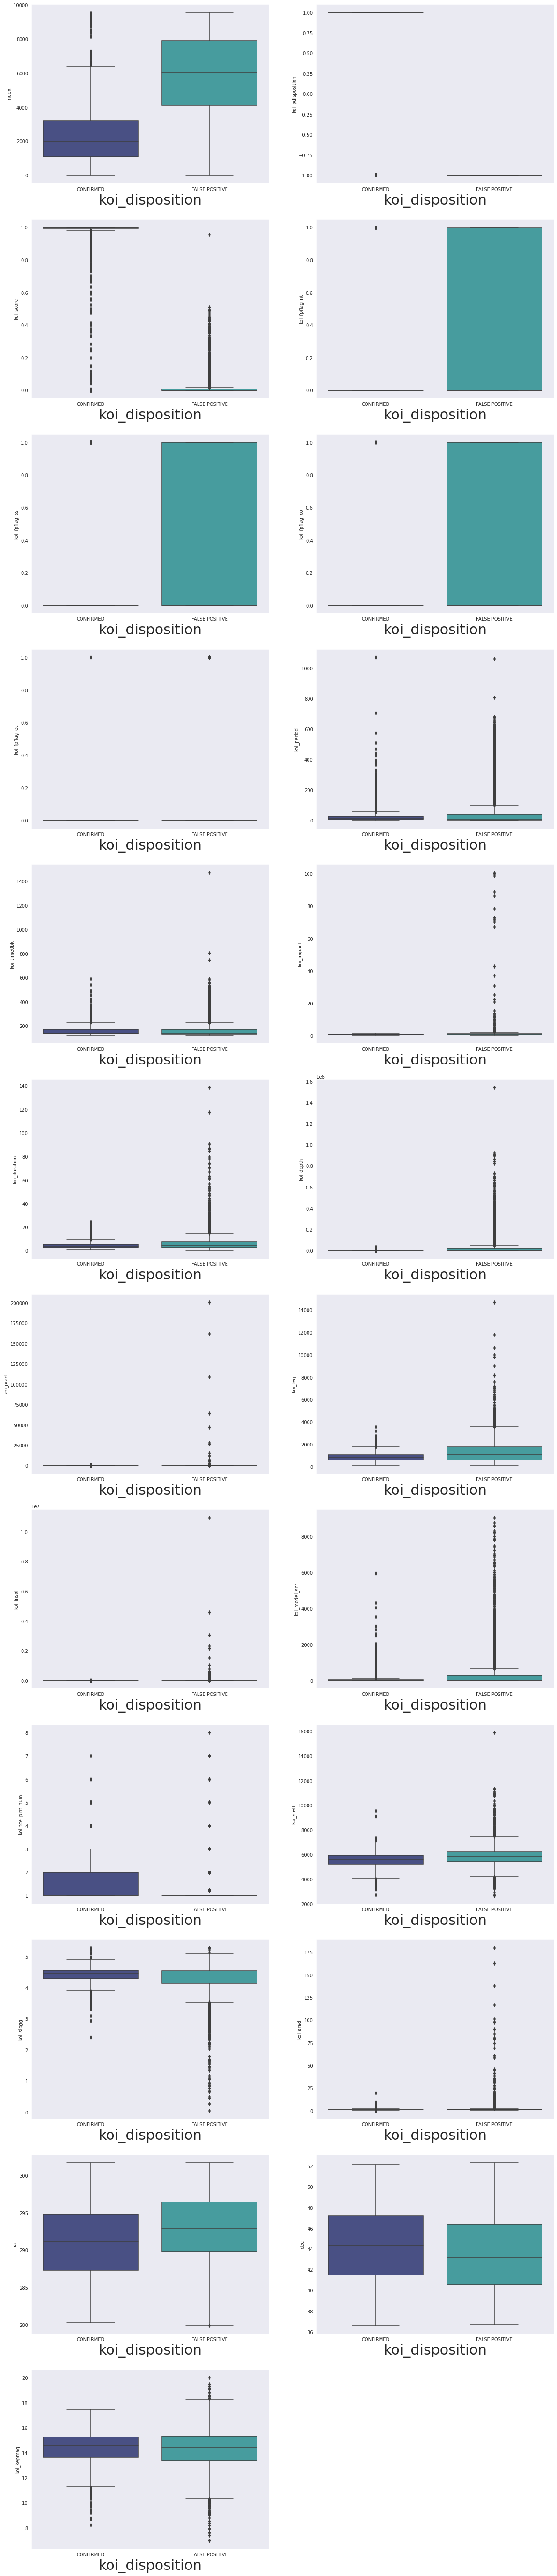

In [ ]:
col_without_err = [
    col for col in df if 'err' not in col
]
df_no_err = df.loc[:, col_without_err]
fig, axes = plt.subplots(12, 2, figsize=(20, 100))
index = 0
for i, pred in enumerate(df_no_err.select_dtypes(exclude=['object']).columns):
    row = int(i / 2)
    col = int(i % 2)
    b = sns.boxplot(x="koi_disposition", y=pred, palette='mako', data=df_no_err, ax=axes[row, col])
    b.set_xlabel("koi_disposition", fontsize=30)
fig.delaxes(axes[11, 1])
plt.show()

In [18]:
#Remove one of those features which have a higher correlation than 0.95
correlation = dataframe.corr()
unstacked_dataframe = correlation.abs().unstack()
sorted_data = unstacked_dataframe.sort_values()
indices = sorted_data.index
remove_label = []
already_seen_dict = {}
for i in range(len(sorted_data)):
  if(sorted_data[i] > 0.95 and indices[i][0] !=indices[i][1] and (indices[i][0] + indices[i][1]) not in already_seen_dict):
    already_seen_dict[indices[i][0]+indices[i][1]] = 0
    already_seen_dict[indices[i][1]+indices[i][0]] = 0
    remove_label.append(indices[i][0])
remove_label = np.unique(remove_label)
for i in range(len(remove_label)):
  dataframe.drop(remove_label[i], inplace=True, axis=1)

In [19]:
remove_label

array(['koi_depth_err2', 'koi_duration_err1', 'koi_insol_err2',
       'koi_period_err1', 'koi_prad_err2', 'koi_score',
       'koi_time0bk_err2'], dtype='<U17')

In [20]:
data_y = np.array(dataframe.loc[:,dataframe.columns == "koi_disposition"])
data_x = np.array(dataframe.loc[:,dataframe.columns != "koi_disposition"])

In [21]:
dataframe["koi_disposition"].value_counts()

FALSE POSITIVE    4647
CONFIRMED         2292
Name: koi_disposition, dtype: int64

In [22]:
#split data into train and test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,test_size=0.20,random_state = 56,stratify=data_y)
train_y = train_y.reshape(train_y.shape[0])
test_y = test_y.reshape(test_y.shape[0])
scaler  =  StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [23]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
train_x_pca = pca.fit_transform(train_x_scaled)
print(pca.explained_variance_ratio_)

[0.13182806 0.11419431 0.09697953 0.08756396 0.06007418 0.04928351
 0.04135324 0.03413073 0.03056856 0.02959238 0.02794502 0.02662349
 0.02594252 0.02469338 0.02337388 0.02120353 0.02095737 0.01746946
 0.01558951 0.01306057 0.01260592 0.01113231 0.01099691 0.0101132
 0.00960584 0.00891591 0.00818756 0.00687903 0.00668271 0.00569895
 0.00461988 0.00390739 0.00345103 0.00245199 0.00162342 0.00070077]


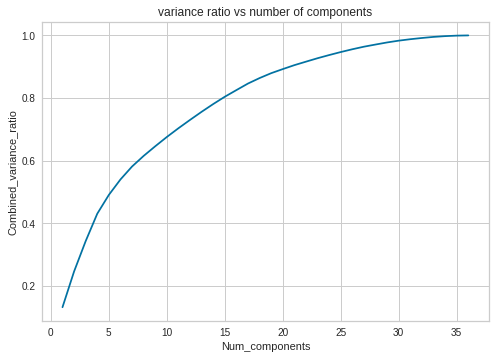

In [24]:
#PCA_graph
n_component_list = [i for i in range(1,train_x_scaled.shape[1] + 1)]
variance_ratio_combined = []
for i in range(len(n_component_list)):
  pca = PCA(n_components = n_component_list[i])
  train_x_pca = pca.fit_transform(train_x_scaled)
  variance_ratio_combined.append(sum(pca.explained_variance_ratio_))
plt.xlabel('Num_components')
plt.ylabel('Combined_variance_ratio')
plt.title("variance ratio vs number of components")
plt.plot(n_component_list, variance_ratio_combined)
plt.show()

In [25]:
n_comp = 0
sum_=0
for i in range(len(pca.explained_variance_ratio_)):
  sum_+=pca.explained_variance_ratio_[i]
  if(sum_ < 0.90):
    n_comp+=1
  else:
    break

In [26]:
pca = PCA(n_components=n_comp)
train_x = pca.fit_transform(train_x_scaled)
test_x = pca.transform(test_x_scaled)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from yellowbrick.model_selection import LearningCurve

In [37]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['grid.color'] = 'white'
plt.rcParams["axes.facecolor"] = "gainsboro"

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{'criterion':["gini", "entropy"],'max_depth':[6,8,10,12,14,16,18],"n_estimators":[80,100,120,140]}]
classifification_model_obj = GridSearchCV(estimator = RandomForestClassifier(random_state = 62),param_grid = param_grid,scoring = 'accuracy',refit=True).fit(train_x,train_y)
classifification_model_not_fitted = classifification_model_obj.best_estimator_
classifification_model = classifification_model_obj.best_estimator_
classifification_model.fit(train_x,train_y)
print("Accuracy is {}".format(classifification_model.score(test_x,test_y)))
print("Best parameters are {}".format(classifification_model_obj.best_params_))
confusion_mat = confusion_matrix(test_y, classifification_model.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,classifification_model.predict_proba(test_x)[:,1])))


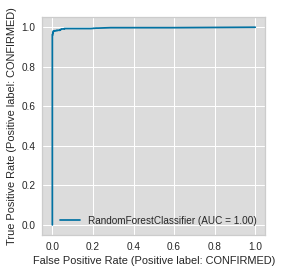

In [40]:
RocCurveDisplay.from_estimator(classifification_model,test_x,test_y,pos_label = "CONFIRMED")

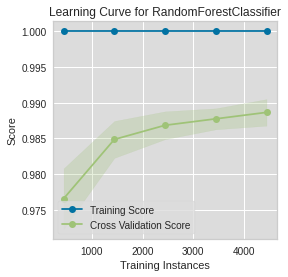

In [41]:
#Random forest
plot_learning_curve = LearningCurve(classifification_model_not_fitted, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show() 

Accuracy is 0.9877521613832853
Best parameters are {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=3), 'n_estimators': 70}
Precison: 0.9861554845580405, Recall : 0.9956989247311828 , F1_score:0.9909042268592831 
AUROC is 0.9975630370474715


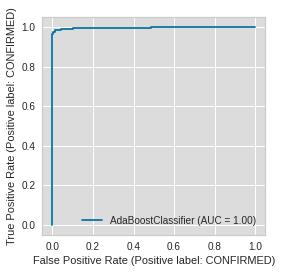

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = [{'base_estimator':[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],'n_estimators':[40,50,60,70],'algorithm':['SAMME','SAMME.R']}]
classifification_model_obj = GridSearchCV(estimator = AdaBoostClassifier(random_state = 52),param_grid = param_grid,scoring = 'accuracy',refit=True).fit(train_x,train_y) 
classifification_model_not_fitted = classifification_model_obj.best_estimator_
classifification_model = classifification_model_obj.best_estimator_
classifification_model.fit(train_x,train_y)
print("Accuracy is {}".format(classifification_model.score(test_x,test_y)))
print("Best parameters are {}".format(classifification_model_obj.best_params_))
confusion_mat = confusion_matrix(test_y, classifification_model.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,classifification_model.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(classifification_model,test_x,test_y,pos_label = "CONFIRMED")

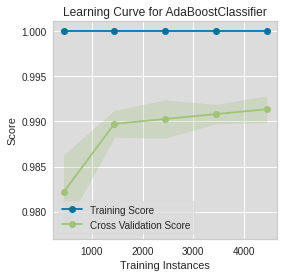

In [43]:
#adaboost
plot_learning_curve = LearningCurve(classifification_model_not_fitted, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show() 

Accuracy is 0.9913544668587896
Best parameters are {'activation': 'relu', 'max_iter': 300, 'solver': 'adam'}
Precison: 0.9903846153846154, Recall : 0.9967741935483871 , F1_score:0.9935691318327974 
AUROC is 0.9957458797013664


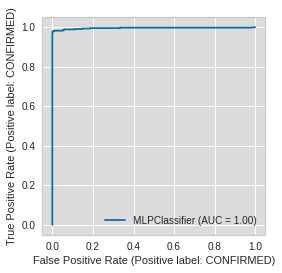

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

param_grid = [{'activation':['identity', 'logistic', 'tanh', 'relu'],'solver':['lbfgs', 'sgd', 'adam'],'max_iter':[300,500]}]
classifification_model_obj = GridSearchCV(estimator = MLPClassifier(random_state = 1),param_grid = param_grid,scoring = 'accuracy',refit=True).fit(train_x,train_y) 
classifification_model_not_fitted = classifification_model_obj.best_estimator_
classifification_model = classifification_model_obj.best_estimator_
classifification_model.fit(train_x,train_y)
print("Accuracy is {}".format(classifification_model.score(test_x,test_y)))
print("Best parameters are {}".format(classifification_model_obj.best_params_))
confusion_mat = confusion_matrix(test_y, classifification_model.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,classifification_model.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(classifification_model,test_x,test_y,pos_label = "CONFIRMED")

0.9949558638083228


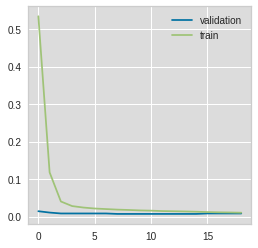

In [45]:
#MLP loss curves
mlp = MLPClassifier(activation = 'relu', hidden_layer_sizes = (256,32), early_stopping=True , validation_fraction=0.15 , random_state=42)
mlp.fit(train_x, train_y)
print(mlp.score(train_x, train_y))
train_loss = mlp.loss_curve_
val_loss = np.subtract(np.ones((len(mlp.validation_scores_))), np.array(mlp.validation_scores_))
plt.plot(val_loss , label="validation")
plt.plot(train_loss , label="train")
plt.legend()
plt.show()

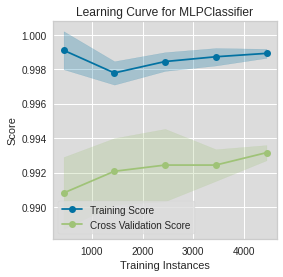

In [46]:
#MLP
plot_learning_curve = LearningCurve(classifification_model_not_fitted, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show() 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

Accuracy is 0.9906340057636888
Best parameters are {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Precison: 0.9882854100106496, Recall : 0.9978494623655914 , F1_score:0.993044408774746 
AUROC is 0.9966356763863455


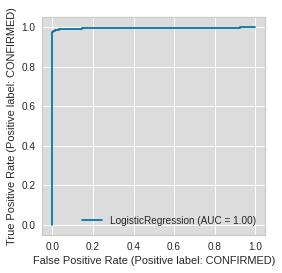

In [48]:
parameters = {'penalty': ['l1','l2'], 'C': np.logspace(-3,3,7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
lrg = LogisticRegression(random_state = 67)
clf = GridSearchCV(lrg, param_grid = parameters, scoring = 'accuracy', cv = 10)
clf.fit(train_x, train_y)
lrg = LogisticRegression(C = clf.best_params_["C"], penalty = clf.best_params_["penalty"], solver = clf.best_params_["solver"])
lrg_not_fitted = LogisticRegression(C = clf.best_params_["C"], penalty = clf.best_params_["penalty"], solver = clf.best_params_["solver"])
lrg.fit(train_x, train_y)
print("Accuracy is {}".format(lrg.score(test_x,test_y)))
print("Best parameters are {}".format(clf.best_params_))
confusion_mat = confusion_matrix(test_y, lrg.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,lrg.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(lrg,test_x,test_y,pos_label = "CONFIRMED")

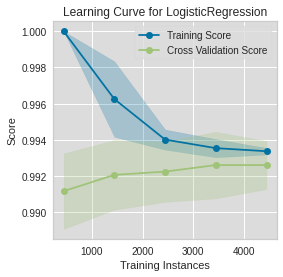

In [49]:
#logistic regression
plot_learning_curve = LearningCurve(lrg_not_fitted, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show() 

Accuracy is 0.9812680115273775
Best parameters are {'criterion': 'entropy', 'max_depth': 6}
Precison: 0.9849785407725322, Recall : 0.9870967741935484 , F1_score:0.9860365198711063 
AUROC is 0.9847760247922241


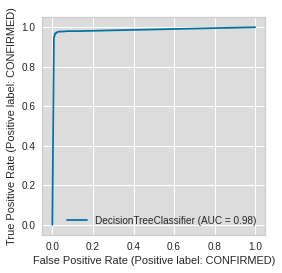

In [50]:
dt = DecisionTreeClassifier(random_state = 67)
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(criterion=criterion, max_depth=max_depth)
clf_dt = GridSearchCV(dt, param_grid = parameters, scoring = 'accuracy', cv = 10)
clf_dt.fit(train_x, train_y)
dt = DecisionTreeClassifier(criterion = clf_dt.best_params_["criterion"], max_depth = clf_dt.best_params_["max_depth"])
dt_not_fitted = DecisionTreeClassifier(criterion = clf_dt.best_params_["criterion"], max_depth = clf_dt.best_params_["max_depth"])
dt.fit(train_x, train_y)
print("Accuracy is {}".format(dt.score(test_x,test_y)))
print("Best parameters are {}".format(clf_dt.best_params_))
confusion_mat = confusion_matrix(test_y, dt.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,dt.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(dt,test_x,test_y,pos_label = "CONFIRMED")

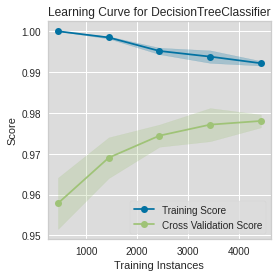

In [51]:
plot_learning_curve = LearningCurve(dt_not_fitted, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show()  

In [52]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

Accuracy is 0.9690201729106628
Precison: 0.9663512092534174, Recall : 0.9881720430107527 , F1_score:0.9771398192450824 
AUROC is 0.982578532187632


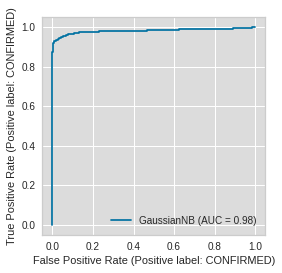

In [53]:
GaussianNB_o = GaussianNB()
model_GaussianNB = GaussianNB_o.fit(train_x, np.ravel(train_y))
model_GaussianNB.score(test_x,np.ravel(test_y))
print("Accuracy is {}".format(model_GaussianNB.score(test_x,test_y)))
confusion_mat = confusion_matrix(test_y, model_GaussianNB.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,model_GaussianNB.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(model_GaussianNB,test_x,test_y,pos_label = "CONFIRMED")

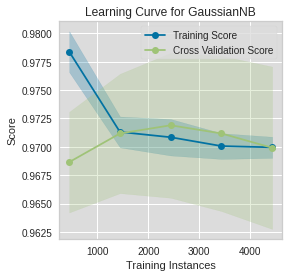

In [54]:
plot_learning_curve = LearningCurve(GaussianNB(), cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show()  

Accuracy is 0.957492795389049
Precison: 0.958904109589041, Recall : 0.978494623655914 , F1_score:0.9686003193187867 
AUROC is 0.986691787575715


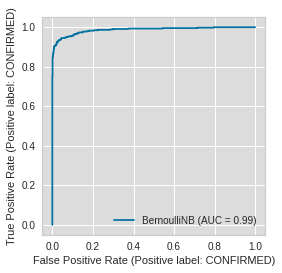

In [55]:
BernoulliNB_o = BernoulliNB()
model_BernoulliNB = BernoulliNB_o.fit(train_x, np.ravel(train_y))
model_BernoulliNB.score(test_x,np.ravel(test_y))
print("Accuracy is {}".format(model_BernoulliNB.score(test_x,test_y)))
confusion_mat = confusion_matrix(test_y, model_BernoulliNB.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,model_BernoulliNB.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(model_BernoulliNB,test_x,test_y,pos_label = "CONFIRMED")


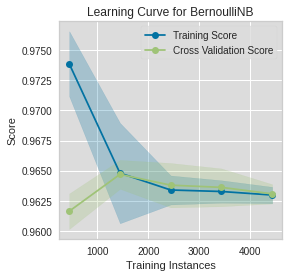

In [56]:
plot_learning_curve = LearningCurve(BernoulliNB(), cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show()  

Accuracy is 0.9906340057636888
Best parameters are {'C': 10, 'kernel': 'rbf'}
Precison: 0.9914255091103966, Recall : 0.9946236559139785 , F1_score:0.9930220075147612 
AUROC is 0.9974174766399023


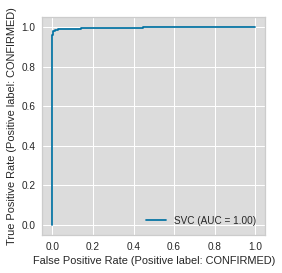

In [57]:
from sklearn.svm import SVC

param_grid = [{'C':[0.001, 0.01, 0.1, 1,10,100,1000],'kernel':["linear","rbf", "sigmoid"]},{'C':[0.001, 0.01, 0.1, 1,10,100,1000],'kernel':["poly"],"degree" :[2,3,4,5]}]
classifification_model_obj = GridSearchCV(estimator = SVC(random_state = 62,class_weight = 'balanced',probability = True),param_grid = param_grid,scoring = 'accuracy',refit=True).fit(train_x,train_y)
classifification_model_not_fitted = classifification_model_obj.best_estimator_
classifification_model = classifification_model_obj.best_estimator_
classifification_model.fit(train_x,train_y)
print("Accuracy is {}".format(classifification_model.score(test_x,test_y)))
print("Best parameters are {}".format(classifification_model_obj.best_params_))

confusion_mat = confusion_matrix(test_y, classifification_model.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,classifification_model.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(classifification_model,test_x,test_y,pos_label = "CONFIRMED")

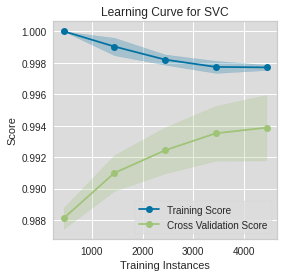

In [58]:
plot_learning_curve = LearningCurve(classifification_model_not_fitted, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show()  

Epoch 1/6
70/70 [==============================] - 2s 6ms/step - loss: 0.6338 - accuracy: 0.7005 - val_loss: 0.5293 - val_accuracy: 0.8155
Epoch 2/6
70/70 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8930 - val_loss: 0.3671 - val_accuracy: 0.9325
Epoch 3/6
70/70 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.9550 - val_loss: 0.2520 - val_accuracy: 0.9703
Epoch 4/6
70/70 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9723 - val_loss: 0.1776 - val_accuracy: 0.9784
Epoch 5/6
70/70 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9815 - val_loss: 0.1319 - val_accuracy: 0.9847
Epoch 6/6
44/44 [==============================] - 0s 1ms/step
Accuracy is 0.9877521613832853
Precison: 0.9977426636568849, Recall : 0.9650655021834061 , F1_score:0.9811320754716981 
AUROC is 0.9969502746865756
44/44 [==============================] - 0s 1ms/step


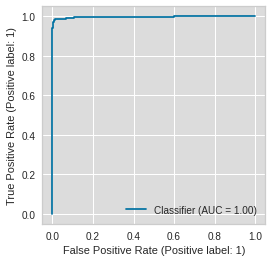

In [59]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

train_y_int = []
test_y_int = []
for i in range(len(train_y)):
  if(train_y[i] == "CONFIRMED"):
    train_y_int.append(1)
  else:
    train_y_int.append(0)
train_y_int = np.array(train_y_int)
train_y_int = train_y_int.astype(np.int64)
for i in range(len(test_y)):
  if(test_y[i] == "CONFIRMED"):
    test_y_int.append(1)
  else:
    test_y_int.append(0)
test_y_int = np.array(test_y_int)
test_y_int = test_y_int.astype(np.int64)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.he_normal(seed=42)))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dense(5,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.he_normal(seed=65)))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.he_normal(seed=56)))
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer= adam_opt,
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history_obj_1 = model.fit(train_x, train_y_int,validation_split=0.2, epochs=6,batch_size = 64)
scores = model.evaluate(
  test_x,
  test_y_int
)

samples_identified = model.predict(test_x)
total_correct = 0
for i in range(len(samples_identified)):
  if(samples_identified[i] > 0.5):
    samples_identified[i] = 1
  else:
    samples_identified[i] = 0
for i in range(len(samples_identified)):
  if(samples_identified[i] == test_y_int[i]):
    total_correct+=1
scores = model.evaluate(
  test_x,
  test_y_int
)
auroc = roc_auc_score(test_y_int, model.predict(test_x))
cf_mat = confusion_matrix(test_y_int, samples_identified)
true_negative = cf_mat[0][0]
false_positive = cf_mat[0][1]
false_negative = cf_mat[1][0]
true_positive = cf_mat[1][1]
accuracy = (true_positive + true_negative)/(true_negative + false_positive + false_negative + true_positive)
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Accuracy is {}".format(accuracy))
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(auroc))
RocCurveDisplay.from_predictions(test_y_int, model.predict(test_x))

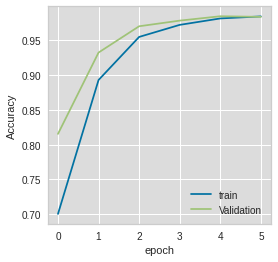

In [60]:
train_accuracy = history_obj_1.history['accuracy']
test_accuracy = history_obj_1.history['val_accuracy']
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'])
plt.show()

In [61]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Accuracy is 0.9884726224783862
Best parameters are {'max_depth': 8, 'n_estimators': 140, 'reg_lambda': 10}
Precison: 0.9830866807610994, Recall : 1.0 , F1_score:0.9914712153518124 
AUROC is 0.9971850495374935


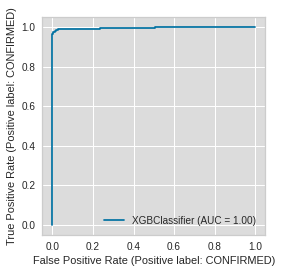

In [62]:
import xgboost

param_grid = [{'reg_lambda':[0.001, 0.01, 0.1, 1,10,100,1000],'max_depth':[6,8,10,12,14,16,18],"n_estimators":[80,100,120,140]}]
classifification_model_obj = GridSearchCV(estimator = xgboost.XGBClassifier(random_state = 62),param_grid = param_grid,scoring = 'accuracy',refit=True).fit(train_x,train_y)
classifification_model_not_fitted = classifification_model_obj.best_estimator_
classifification_model = classifification_model_obj.best_estimator_
classifification_model.fit(train_x,train_y)
print("Accuracy is {}".format(classifification_model.score(test_x,test_y)))
print("Best parameters are {}".format(classifification_model_obj.best_params_))
confusion_mat = confusion_matrix(test_y, classifification_model.predict(test_x))
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,classifification_model.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(classifification_model,test_x,test_y,pos_label = "CONFIRMED")

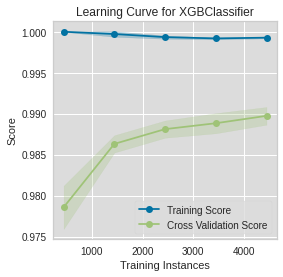

In [63]:
plot_learning_curve = LearningCurve(classifification_model_not_fitted, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show()  

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [73]:
k=200
kmeans = KMeans(n_clusters=k)
X_dist = kmeans.fit_transform(train_x) 
representative_idx = np.argmin(X_dist, axis=0) 
X_representative = [list(train_x)[x] for x in representative_idx]
y_representative = [list(train_y)[x] for x in representative_idx]
pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("log_reg", LogisticRegression()),
    ])


0.9870317002881844
Precison: 0.9820295983086681, Recall : 0.9989247311827957 , F1_score:0.990405117270789 
AUROC is 0.9947856505611119


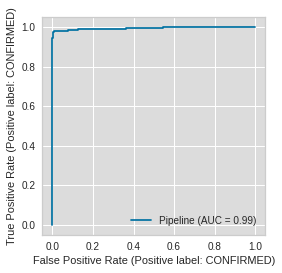

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')
pipeline.fit(X_representative, y_representative)
print(pipeline.score(test_x, test_y))
y_pred = pipeline.predict(test_x)
confusion_mat = confusion_matrix(test_y, y_pred)
true_negative,false_positive,false_negative,true_positive = confusion_mat.ravel()
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1_score_val = (2 * recall * precision)/(recall + precision)
print("Precison: {}, Recall : {} , F1_score:{} ".format(precision,recall,f1_score_val))
print("AUROC is {}".format(roc_auc_score(test_y,pipeline.predict_proba(test_x)[:,1])))
RocCurveDisplay.from_estimator(pipeline,test_x,test_y,pos_label = "CONFIRMED")

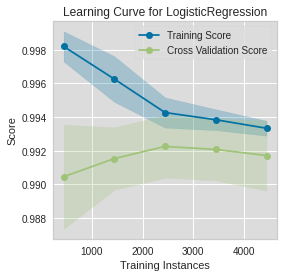

In [75]:
from yellowbrick.model_selection import LearningCurve
plot_learning_curve = LearningCurve(pipeline, cv=5, scoring='accuracy')
plot_learning_curve.fit(train_x, train_y)
plot_learning_curve.show()  